
A hipótese da Elasticidade do Ozônio, focada na diferença entre áreas urbanas e rurais/periféricas, pode ser resumida na seguinte frase:
> Em grandes centros urbanos, a redução de NO2 (poluente primário) pode ter um efeito não-linear ou até contra-intuitivo (aumento ou pouca mudança) na concentração de O3 (poluente secundário) devido ao balanço químico, enquanto em áreas periféricas, o O3 é principalmente governado pelo transporte de precursores e fatores climáticos (temperatura).
>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'D:\Documentos\VsCode\projetos_git\portifolio\data_science_portfolio\mini_projects\air_quality_analysis\data\raw\pollution_us_2000_2016.csv')

df.head(1)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.0,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN


In [3]:
df.shape

(1746661, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [5]:
df.isna().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [6]:
df = df.drop(columns=['CO AQI', 'SO2 AQI', 'Unnamed: 0'])

In [7]:
df['Date Local'] = pd.to_datetime(df['Date Local'])
df['Year'] = df['Date Local'].dt.year
df['Month'] = df['Date Local'].dt.month
df['Day'] = df['Date Local'].dt.day
df = df.drop(columns=['Date Local'])

In [8]:

def pollution_graphs(df, metric, group_col=['State', 'Year']):
    """
    Cria boxplots e heatmaps comparando uma métrica de poluição
    por agrupamentos (ex: Estado e Ano).

    Parâmetros
    ----------
    df : pd.DataFrame
        DataFrame com as colunas de poluentes e agrupamentos.
    metric : str
        Nome da coluna (métrica) a ser analisada. Ex: 'NO2 Mean'
    group_col : list ou str, opcional
        Coluna(s) para agrupar (ex: ['State', 'Year'] ou 'State').
    """
    output_path = r'D:\Documentos\VsCode\projetos_git\portifolio\data_science_portfolio\mini_projects\air_quality_analysis\reports\{}_boxplot.png'.format(metric)

    # Garante que group_col seja lista
    if isinstance(group_col, str):
        group_col = [group_col]

    # ---------- Agrupamento ----------
    grouped = df.groupby(group_col)[[metric]].mean().reset_index()

    # ---------- BOXPLOT ----------
    plt.figure(figsize=(15,6))
    sns.boxplot(x=group_col[0], y=metric, data=grouped)
    plt.xticks(rotation=90)
    plt.title(f'Distribuição de {metric} por {group_col[0]}')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

    # ---------- HEATMAP ----------

    if 'Year' in grouped.columns and 'State' in grouped.columns:
        heatmap_data = grouped.pivot(index='State', columns='Year', values=metric)

        plt.figure(figsize=(12,6))
        sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5)
        plt.title(f'{metric} por Estado e Ano')
        plt.tight_layout()
        plt.savefig(output_path)
        plt.show()

NO2 - Dióxido de Nitrogênio

Origem: Queima de combustíveis fósseis (carros, caminhões, indústrias, usinas termoelétricas).

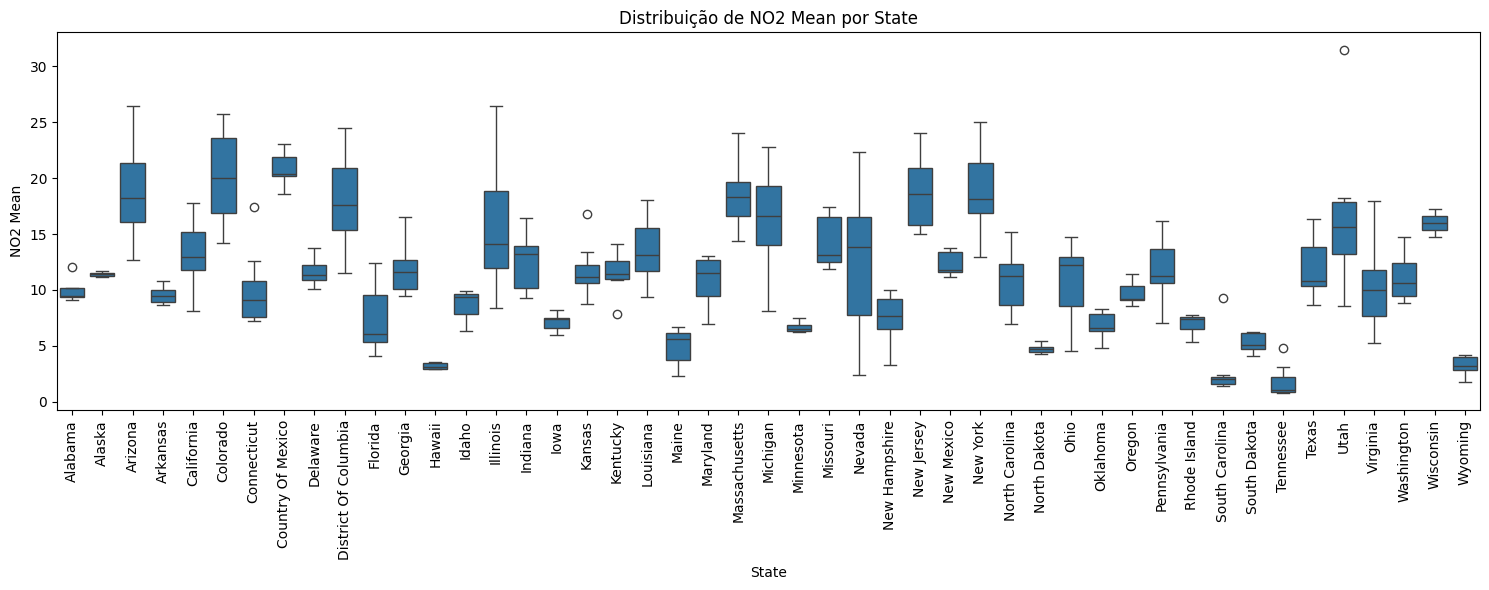

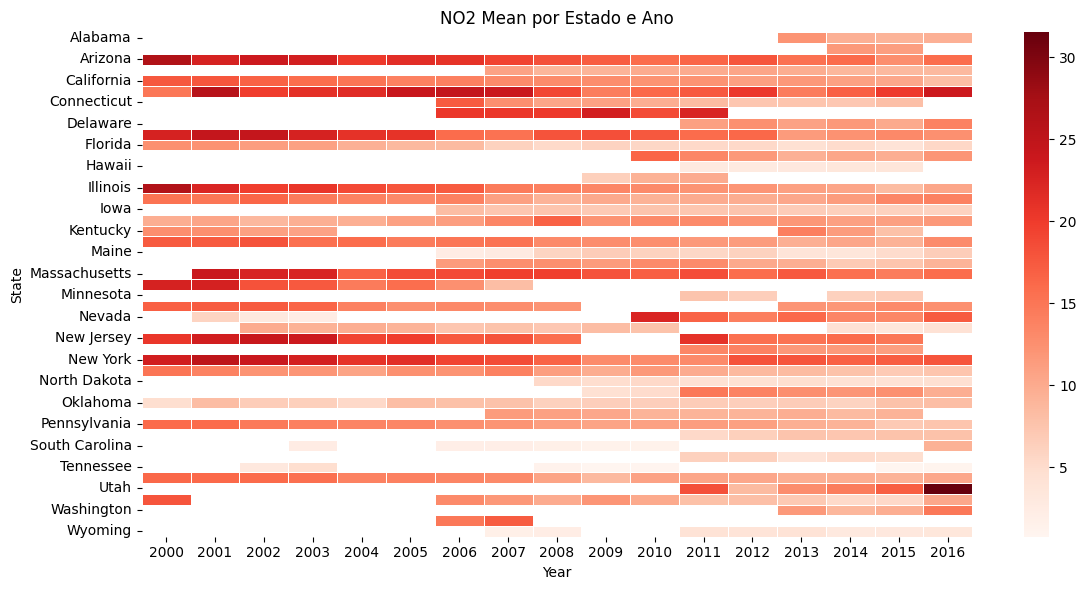

In [9]:
pollution_graphs(df, metric='NO2 Mean', group_col=['State', 'Year'])

O₃ — Ozônio (troposférico)

Origem: Não é emitido diretamente. Forma-se na atmosfera quando NO₂ e compostos orgânicos voláteis (COVs) reagem sob luz solar.

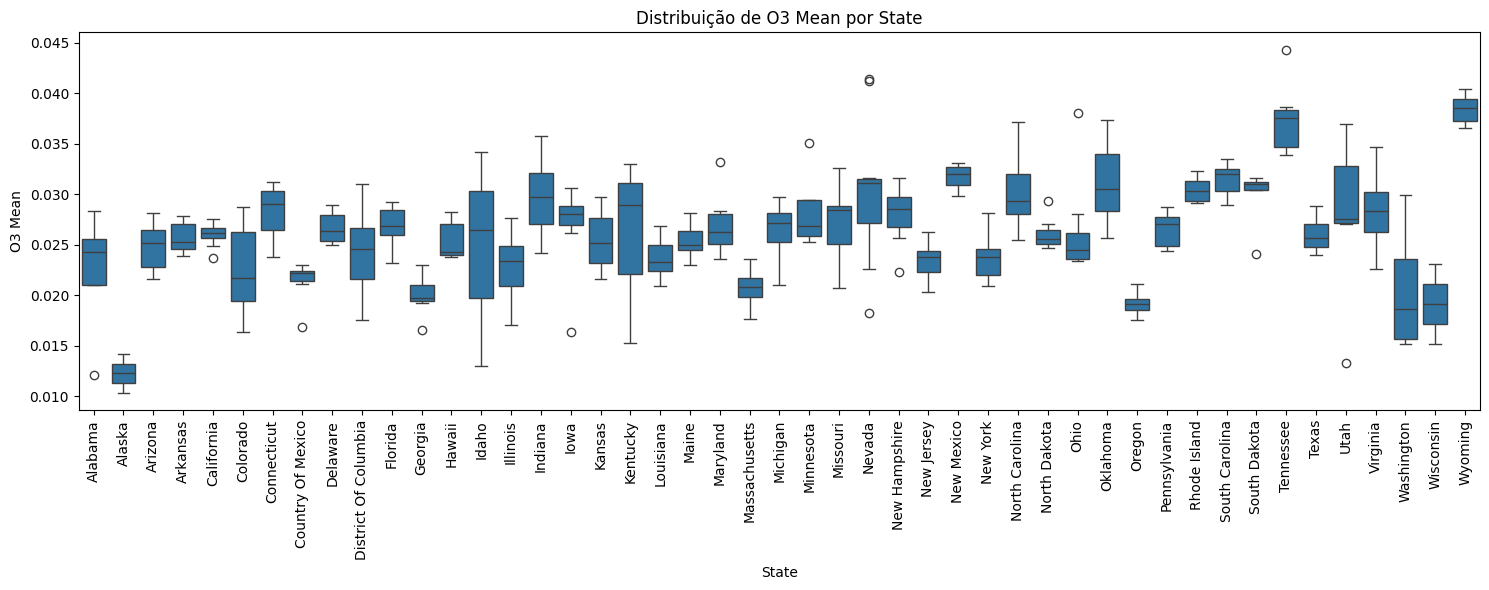

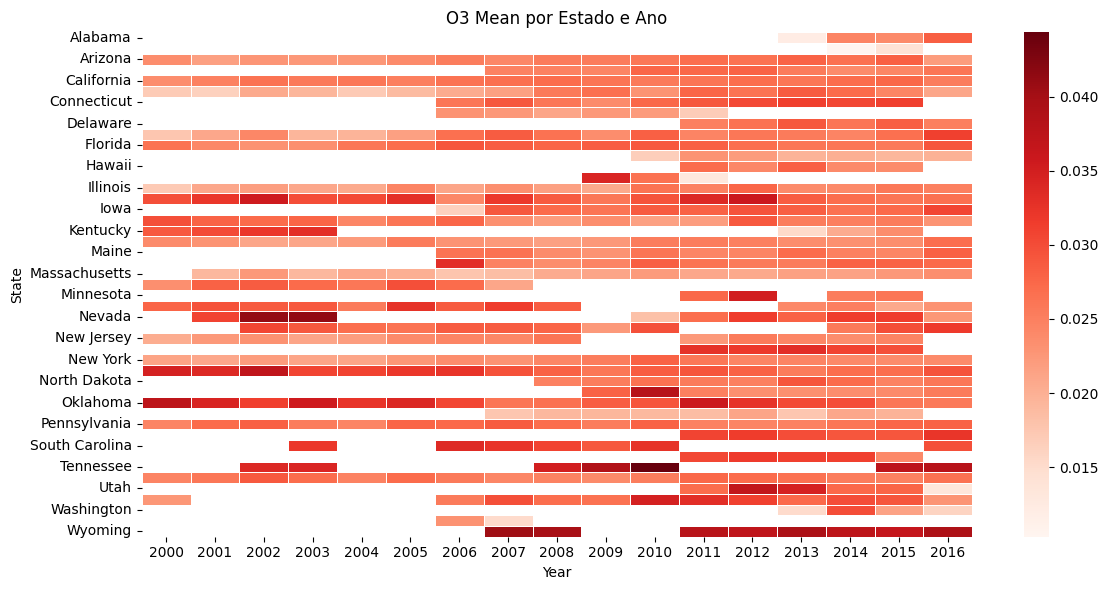

In [10]:
pollution_graphs(df, metric='O3 Mean', group_col=['State', 'Year'])

SO₂ — Dióxido de Enxofre

Origem: Queima de carvão, óleo combustível e processos industriais (metalurgia, refinarias).

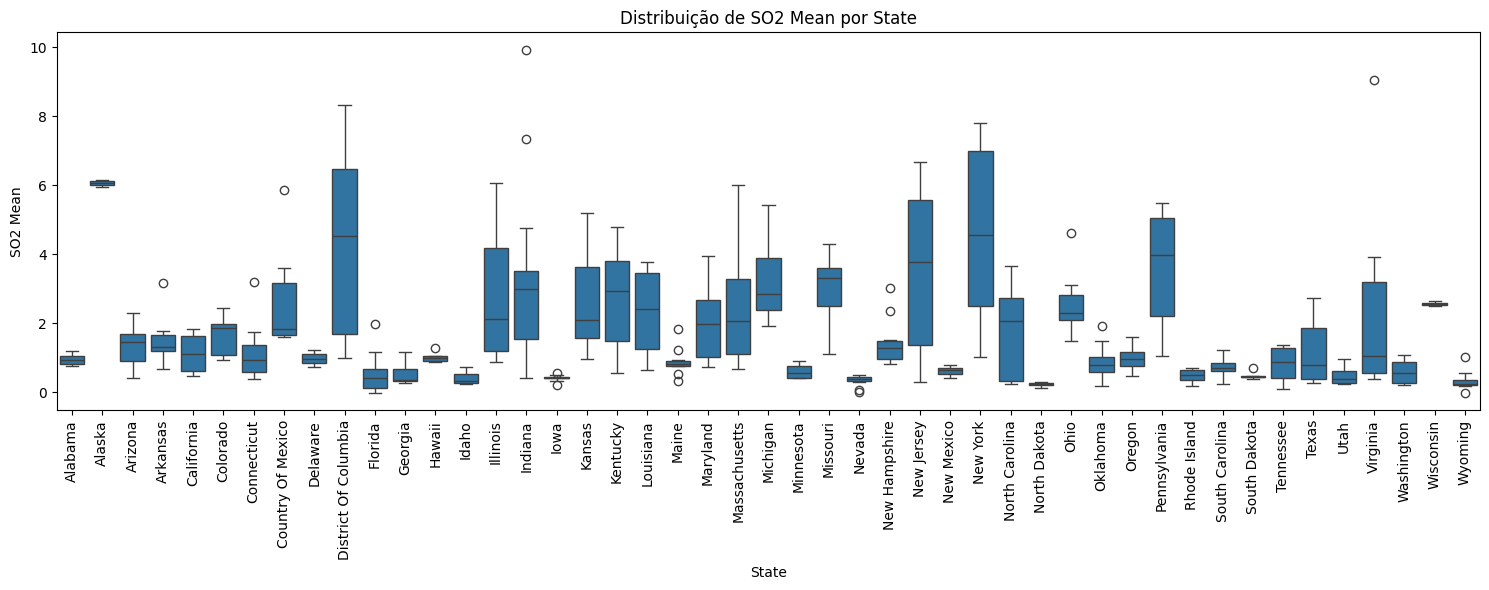

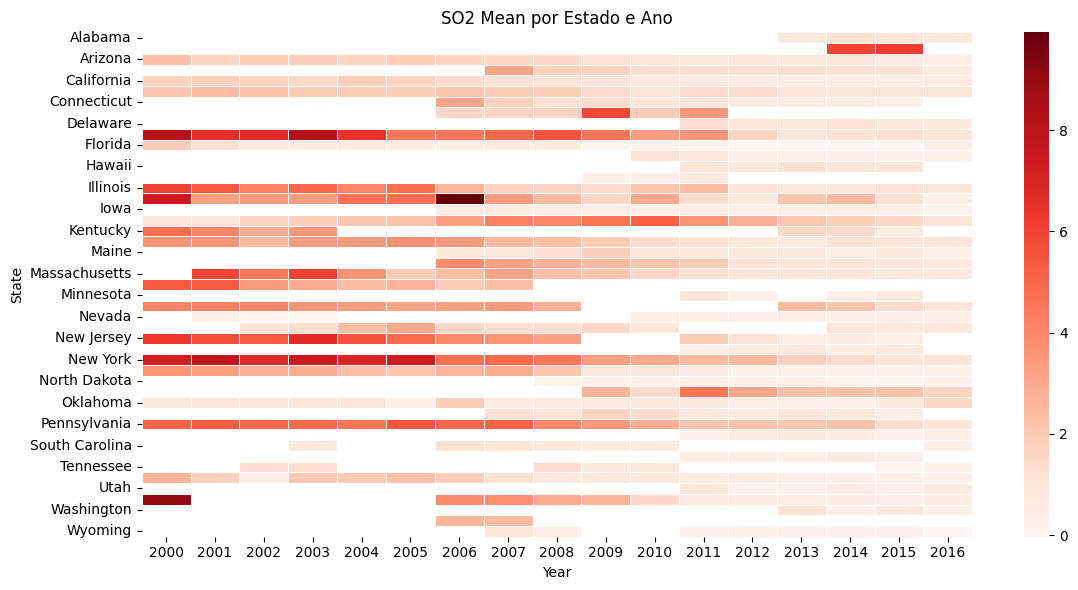

In [11]:
pollution_graphs(df, metric='SO2 Mean', group_col=['State', 'Year'])

CO — Monóxido de Carbono

Origem: Combustão incompleta de gasolina, diesel ou madeira (carros, fogões, queimadas).

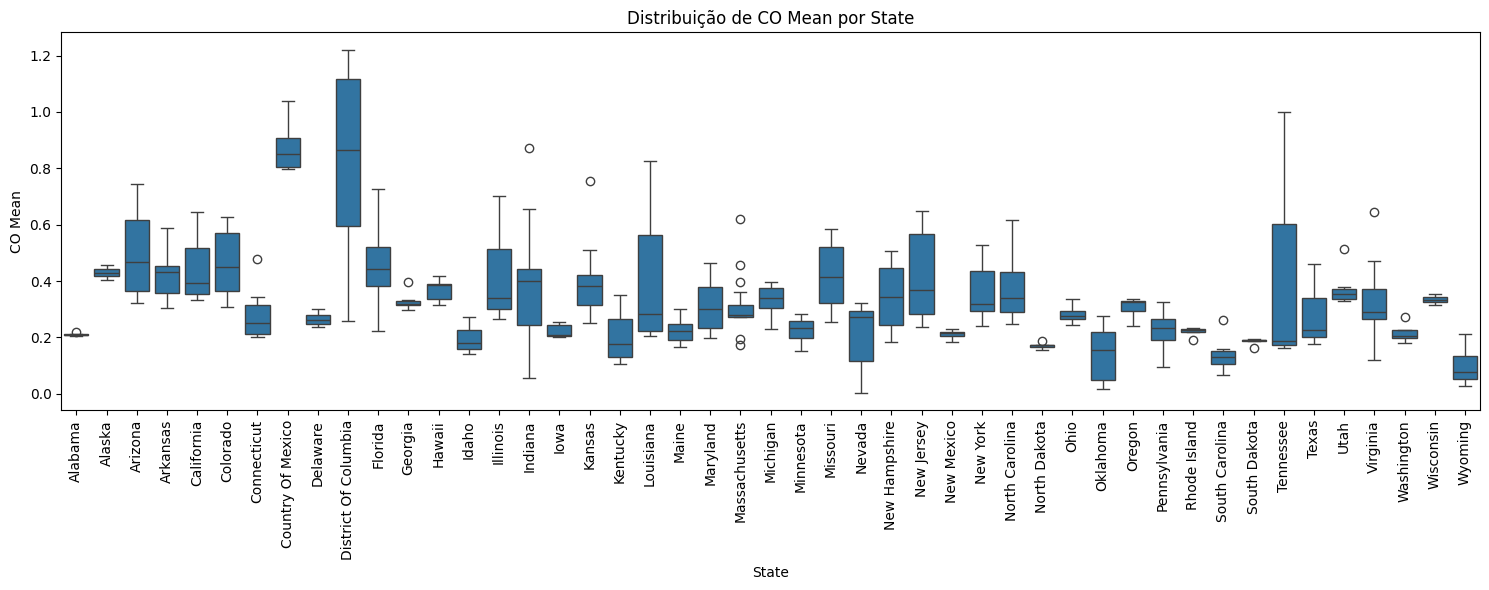

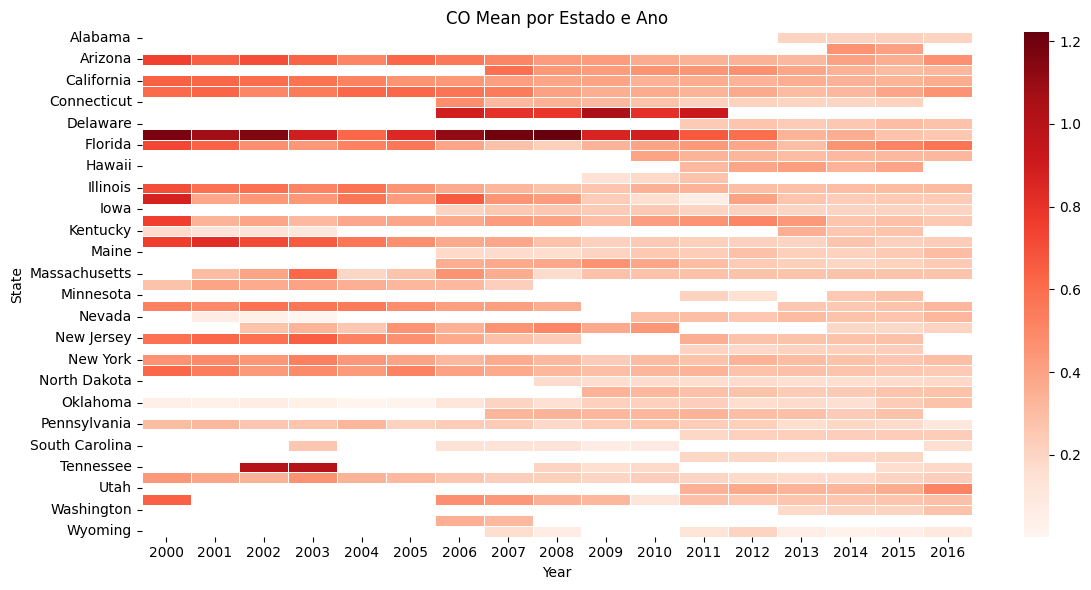

In [12]:
pollution_graphs(df, metric='CO Mean', group_col=['State', 'Year'])

In [13]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'CO Units',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'Year', 'Month',
       'Day'],
      dtype='object')

In [14]:
df_condado_medias = df.groupby(['State', 'County'])['NO2 Mean'].mean().reset_index()

df_condado_medias

,State,County,NO2 Mean
0,Alabama,Jefferson,9.410693
1,Alaska,Fairbanks North Star,11.313152
2,Arizona,Maricopa,21.738927
3,Arizona,Pima,13.717112
4,Arkansas,Pulaski,9.753701
...,...,...,...
134,Wisconsin,Milwaukee,14.968732
135,Wyoming,Fremont,1.553621
136,Wyoming,Laramie,3.825402
137,Wyoming,Sweetwater,4.462534


In [15]:
limite_q3 = df_condado_medias['NO2 Mean'].quantile(0.75)
limite_q1 = df_condado_medias['NO2 Mean'].quantile(0.25)
df_condado_medias['Zona'] = 'Outra'
df_condado_medias.loc[df_condado_medias['NO2 Mean'] >= limite_q3, 'Zona'] = 'Urbana (Alta NO2)'
df_condado_medias.loc[df_condado_medias['NO2 Mean'] <= limite_q1, 'Zona'] = 'Rural/Periférica (Baixa NO2)'
df_final = pd.merge(df, df_condado_medias[['State', 'County', 'Zona']], on=['State', 'County'])

df_final

,State Code,County Code,Site Num,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,...,SO2 1st Max Value,SO2 1st Max Hour,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,Year,Month,Day,Zona
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,49.0,...,9.0,21,Parts per million,1.145833,4.200,21,2000,1,1,Urbana (Alta NO2)
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,49.0,...,9.0,21,Parts per million,0.878947,2.200,23,2000,1,1,Urbana (Alta NO2)
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,49.0,...,6.6,23,Parts per million,1.145833,4.200,21,2000,1,1,Urbana (Alta NO2)
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,49.0,...,6.6,23,Parts per million,0.878947,2.200,23,2000,1,1,Urbana (Alta NO2)
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,22.958333,36.0,...,3.0,22,Parts per million,0.850000,1.600,23,2000,1,2,Urbana (Alta NO2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,Parts per billion,1.083333,1.6,...,0.0,2,Parts per million,0.091667,0.100,2,2016,3,30,Rural/Periférica (Baixa NO2)
1746657,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,Parts per billion,0.939130,1.3,...,0.0,0,Parts per million,0.067714,0.127,0,2016,3,31,Rural/Periférica (Baixa NO2)
1746658,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,Parts per billion,0.939130,1.3,...,0.0,0,Parts per million,0.100000,0.100,0,2016,3,31,Rural/Periférica (Baixa NO2)
1746659,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,Parts per billion,0.939130,1.3,...,0.0,5,Parts per million,0.067714,0.127,0,2016,3,31,Rural/Periférica (Baixa NO2)


In [16]:

meses_verao = [7,8,9]

df_verao = df_final[df_final['Month'].isin(meses_verao)]

df_verao.head(1)

,State Code,County Code,Site Num,Address,State,County,City,NO2 Units,NO2 Mean,NO2 1st Max Value,...,SO2 1st Max Value,SO2 1st Max Hour,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,Year,Month,Day,Zona
696,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,Parts per billion,13.541667,42.0,...,1.0,21,Parts per million,0.495833,1.2,21,2000,7,1,Urbana (Alta NO2)


In [17]:
df_correlacao = df_verao.groupby(['Year', 'Zona']).apply(lambda x: x['O3 Mean'].corr(x['NO2 Mean'])).reset_index(name='Correlacao_O3_NO2')

df_correlacao.head(3)

C:\Users\Ramos\AppData\Local\Temp\ipykernel_8992\1788456818.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_correlacao = df_verao.groupby(['Year', 'Zona']).apply(lambda x: x['O3 Mean'].corr(x['NO2 Mean'])).reset_index(name='Correlacao_O3_NO2')


,Year,Zona,Correlacao_O3_NO2
0,2000,Outra,-0.052535
1,2000,Rural/Periférica (Baixa NO2),-0.124619
2,2000,Urbana (Alta NO2),-0.154169


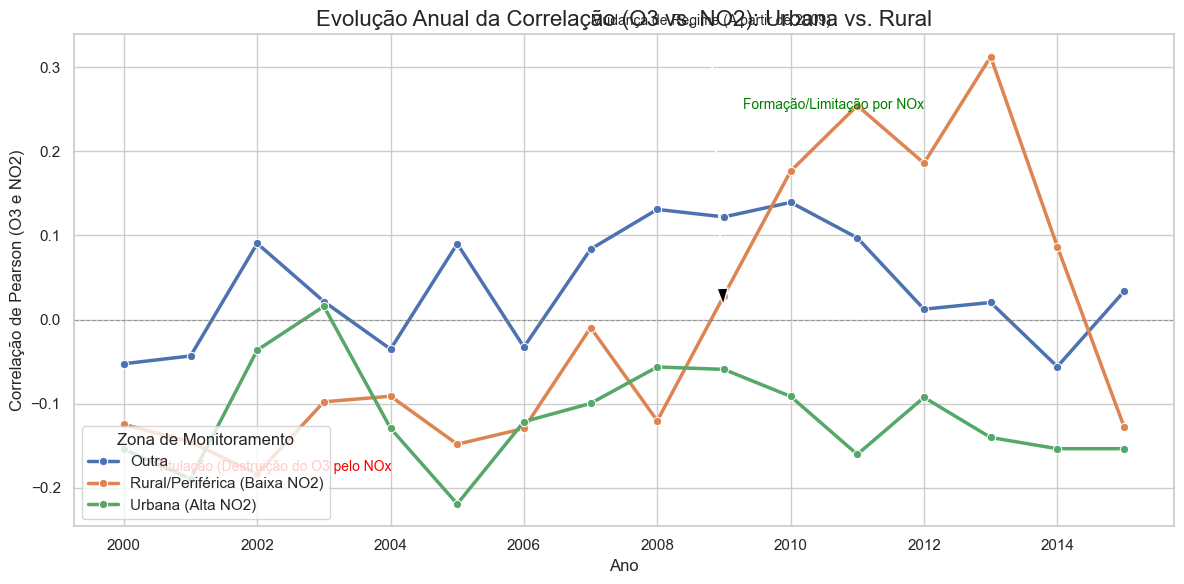

In [19]:


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# A variável 'df_correlacao' contém os dados de correlação que você gerou:
# Colunas: ['Year', 'Zona', 'Correlacao_O3_NO2']

# 1. Plotar a correlação ao longo do tempo (Eixo X: Ano, Eixo Y: Correlação)
# Usaremos o 'seaborn.lineplot' para separar as linhas por 'Zona'.

sns.lineplot(
    data=df_correlacao,
    x='Year',
    y='Correlacao_O3_NO2',
    hue='Zona',
    marker='o',
    dashes=False,
    linewidth=2.5
)

# 2. Adicionar uma linha horizontal em 0 para referência
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

# 3. Adicionar rótulos e título
plt.title('Evolução Anual da Correlação (O3 vs. NO2): Urbana vs. Rural', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Correlação de Pearson (O3 e NO2)', fontsize=12)
plt.legend(title='Zona de Monitoramento', loc='lower left')

# Anotações importantes
plt.text(2000.5, -0.18, 'Titulação (Destruição do O3 pelo NOx', color='red', fontsize=10)
plt.text(2012, 0.25, 'Formação/Limitação por NOx', color='green', fontsize=10, ha='right')
plt.annotate(
    'Mudança de Regime (A partir de 2009)',
    xy=(2009, 0.0),
    xytext=(2007, 0.35),
    arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=8),
    fontsize=10
)

# Ajustar o layout e mostrar
plt.tight_layout()
plt.savefig(r'D:\Documentos\VsCode\projetos_git\portifolio\data_science_portfolio\mini_projects\air_quality_analysis\reports\correlacao_o3_no2_urbana_rural.png')
plt.show()

Conclusão da Análise: Elasticidade do Ozônio (O3 vs. NO2)
O gráfico de Evolução Anual da Correlação entre O3 e NO2 demonstra que a relação química entre o poluente primário (NO2) e o poluente secundário (O3) não é estática e varia fundamentalmente com a localização e ao longo do tempo, validando a hipótese da Elasticidade do Ozônio.
1. Confirmação do Regime Urbano (Linha Verde)
Comportamento Consistente: A Zona Urbana (Alta NO2) manteve uma correlação predominantemente negativa (abaixo da linha zero) ao longo de todo o período (2000–2015).
Interpretação Química (Titulação): Isso confirma o Efeito de Titulação. Em áreas de alta emissão de veículos, o excesso de Óxido Nítrico (\text{NO}, precursor do NO2) destrói o Ozônio existente. Portanto, um aumento na poluição do tráfego (NOx) leva à diminuição da concentração líquida de O3 no centro urbano.
Implicação: As políticas de controle de NOx nas cidades são eficazes para reduzir o NO2, mas o ambiente ainda é dominado pelo excesso de precursores, o que é um sinal de poluição primária persistente.
2. Transição e Mudança de Regime Rural/Periférico (Linha Laranja)
Mudança Estrutural (Elasticidade): A Zona Rural/Periférica (Baixa NO2) apresenta a maior evidência da elasticidade. A correlação inicia-se negativa, mas faz uma transição abrupta para valores consistentemente positivos a partir de 2009-2010, atingindo o pico em 2013 (acima de 0.30).
Interpretação Química (Formação): A correlação positiva indica que o regime químico mudou. Esta zona, que é menos poluída, se tornou Limitada por NOx. Isso significa que agora, qualquer aumento residual ou transportado de NO2 (precursor) causa um aumento significativo na formação de O3.
Implicação: Esta área, para onde o Ozônio formado nas cidades é transportado, se tornou muito mais sensível ao controle de NOx após 2009. Para reduzir o O3 nesta zona, a prioridade deve ser o controle rigoroso das emissões de NOx nas áreas urbanas que a abastecem.
Conclusão Final
A análise corrobora a complexidade da Química Atmosférica urbana. As políticas de controle de NOx foram bem-sucedidas em alterar o regime químico das áreas periféricas, mas a poluição de O3 nessas áreas depende fundamentalmente da redução contínua e drástica das emissões urbanas de NO2, que funcionam como o motor do Ozônio transportado.
Para encerrar o projeto, gostaria de explorar uma última área? Podemos calcular a média de SO2 por Estado para identificar as principais regiões industriais e correlacionar com a poluição total, conforme havíamos sugerido na primeira lista de hipóteses.